# E-tivity 2 (12/04/21 - 25/04/21)

* David Mulhall

* 12128856

## Outline

This e-tivity is split into two parts. The first part <a href="#part1">**Stock Predicition**</a> is a group activity where you are tasked with predicting the stock market.

The second <a href="#part2">**Sentiment Analysis**</a> is an individual task, the problem is to predict if a film review is positive or negative.

### Guidelines

The e-tivity is split into five tasks. The first four are "group" excersises, in that you post the solutions to Tasks 1-4 to Gitlab. This will allow the members of your group to send you feedback (via the forums) so you can improve your submission.

The final task is an individual task and together with the other tasks, should be uploaded to Sulis.

Grading guidelines: Weight [5/7]

**Beginning [0-8]**: Task 1 complete with suitable preprocessing steps. Task 5 is posted to GitLab in contravention of instructions. Tasks 1-5 are not in a single notebook, student identification is not correct or filename incorrect.

**Developing [9-12]**: Beginning + Task 2 complete with suitable treatment of missing values. 

**Advancing [13-16]**: Developing + Tasks 3 and 4 complete.

**Accomplished [17-20]**: Advancing + completion of Task 5, using the layers outlined.

<a id='part1'></a>
## Stock Prediction

### Context

There is a small dataset of real stock prices for each working day from the end of 2015 to the end of 2019. There are four variables (with a time stamp), stock price, oil price, gold price and Euro to Dollar exchange. You need to predict the Stock price a day ahead from only the past values of each of the 4 variables. 


### Tasks 1-4 (complete by Monday 19/04/21)

These tasks are to be completed and uploaded to GitLab on which the other group members can comment. The forum activity will form part of the overall mark for the e-tivity.

**Task 1: data preprocessing**

Explain any preprocessing steps you take including but limited to reformatting and also how you have selected the training and test sets. The test set should be 20% of the whole.


**Task 2: data cleaning**

There are a number of missing values in the data. Clean the data so that it is suitable for use with the NN. Bare in mind that you want to retain the time coherency of the data as much as possible.


**Task 3: model construction**

Construct a RNN network that will predict the future value of Stock, one day/time inteval in advance.

**Task 4: test**

Evaluate the model on the test set and display any change in accuracy over time, if any.


### Post (complete by Monday 19/04/21)

Post your solution to Tasks 1-4 in notebook form. If you have not completed all the tasks then that is acceptable. The purpose is to get feedback from others in the group, so if you have only a basic outline then you may get ideas about how to proceed and also examples from others in your group.

### Respond (complete by Wednesday 21/04/21)

If you feel you can provide useful advise then respond to another member of the group through the appropriate forum. Responses should be respectful and offer some sort of advise. Try and avoid clogging the forums with support or thank you messages.

Grading guidelines for the forum posts: Weight [2/7]

**Beginning [0-8]:** Respectful posts of minor value. Significant number of posts without valuable contributions and/or without well-considered questions. Posts about task 5 in contravention of instructions.

**Developing [9-12]:** At least 1 post  exceeding Beginning level with respectful suggestion or thought provoking question. Most posts contain valuable contributions or well-considered questions.

**Advancing [13-16]:** At least 2 posts: equal to or exceeding Beginning level;  with respectful and sound contribution highlighting mistakes or alternative approaches.

**Accomplished [17-20]:** At least 3 posts: equal to or exceeding Accomplished level; with respectful contribution of significant value. 

### Reflect (complete by Sunday 25/04/21)

Reflect on the responses you got from your peers for Tasks 1-4 and modify your own code if you feel that it is necessary. It is useful for yourself and others to send a post outlining what was useful after the reflection.



<a id='part2'></a>
## Sentiment Analysis


This task is a individual task and should **not** to be uploaded to GitHub. No direct support should be given via the forums, although comments about progress or results are allowed. Marks will be deducted if the instructions are not followed (see rubrics). This part should be uploaded directly to Sulis.

### Context

You have a model that predicts the sentiment of a film review (positive or negative) from the IMDB. There are two hyperparameters that format the data from IMDB: the maximum review length and the dictionary size. Below is a RNN model that predicts sentiment values. 


### Task 5:  (completed by Sunday 25/04/21)

Keeping top_words, max_review_lenngth and the embedding_vector_length the same, change the model so that it uses attention only, i.e. there are no recurrent components. The only Keras layers (defined here https://keras.io/api/) that you allowed to use are:
- Input,
- Embedding, 
- Dense, 
- Any Attention (must be at leat one),
- TimeDistributed,
- Any Merging,
- Any Reshaping,
- Any Pooling,
- Dropout. 

You need not use any of the layers (except attention) but you can use some more than once. Can you do at least as good as the RNN example?

**NB** There are many examples of using attention for sentiment analysis but we looking to see if you can construct a sensible model. The model will be delibrately restricted, so do not waste too much time achieving spectacular accuracy. Remember the rules of thumb that we discussed in the Introduction to DL module.


### Final Submission (complete by Sunday 25/04/21)

Submit Tasks 1-5 in a single notebook this before the deadline on Sunday.


# Soultion

In [1]:
# Imports
from tensorflow.keras.datasets import imdb
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Input, Attention,  Layer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## **Task 1: data preprocessing & Task 2: data cleaning**

Explain any preprocessing steps you take including but limited to reformatting and also how you have selected the training and test sets. The test set should be 20% of the whole.

In [2]:
df = pd.read_csv('stock.csv')
df['Date']  = pd.to_datetime(df['Date'])
df

,Date,Stock,Oil,EuroToDollar,Gold
0,2015-11-23,2089.409912,41.490002,0.9432,1124.7
1,2015-11-24,2084.419922,42.040001,0.9388,1131.6
2,2015-11-25,2089.300049,42.689999,0.9420,1128.4
3,2015-11-27,2088.820068,43.250000,0.9438,1114.5
4,2015-11-30,2090.949951,41.770000,0.9468,1123.9
...,...,...,...,...,...
1028,2019-12-24,3225.449951,NaN,0.9022,1518.6
1029,2019-12-26,3227.199951,61.200001,0.9007,1528.9
1030,2019-12-27,3247.229980,61.730000,0.8949,1540.7
1031,2019-12-30,3240.090088,61.709999,0.8915,1543.9


Create a Stock Class, -1 sell, 0 hold, 1 Buy, this is just an experiment to se if my model would be any good for a day trader. This will be used in the task 4 to see if the model created would be any good to use as a day trading model. 

In [3]:
def class_stock(stock_price, prec_change=0.5):
    #class stock based on daily increase
    Stock_class = np.zeros(len(stock_price))
    perc_increase = 1
    yday_s_price = stock_price[0]
    ind = 0

    for s in stock_price:
        if s > (yday_s_price + (yday_s_price * (prec_change/100))):
    #         print('Buy')
            Stock_class[ind -1] = 1
        elif s < (yday_s_price - (yday_s_price * (prec_change/100))):
    #         print('Sell')
            Stock_class[ind -1] = -1       
        else:
            pass

        yday_s_price = s
        ind += 1

    return Stock_class

In [4]:
df['Stock_class'] = class_stock(df['Stock'].to_numpy(), 0.5)
df['Stock_class'].value_counts()

 0.0    634
 1.0    217
-1.0    182
Name: Stock_class, dtype: int64

In [5]:
df

,Date,Stock,Oil,EuroToDollar,Gold,Stock_class
0,2015-11-23,2089.409912,41.490002,0.9432,1124.7,0.0
1,2015-11-24,2084.419922,42.040001,0.9388,1131.6,0.0
2,2015-11-25,2089.300049,42.689999,0.9420,1128.4,0.0
3,2015-11-27,2088.820068,43.250000,0.9438,1114.5,0.0
4,2015-11-30,2090.949951,41.770000,0.9468,1123.9,0.0
...,...,...,...,...,...,...
1028,2019-12-24,3225.449951,NaN,0.9022,1518.6,0.0
1029,2019-12-26,3227.199951,61.200001,0.9007,1528.9,1.0
1030,2019-12-27,3247.229980,61.730000,0.8949,1540.7,0.0
1031,2019-12-30,3240.090088,61.709999,0.8915,1543.9,-1.0


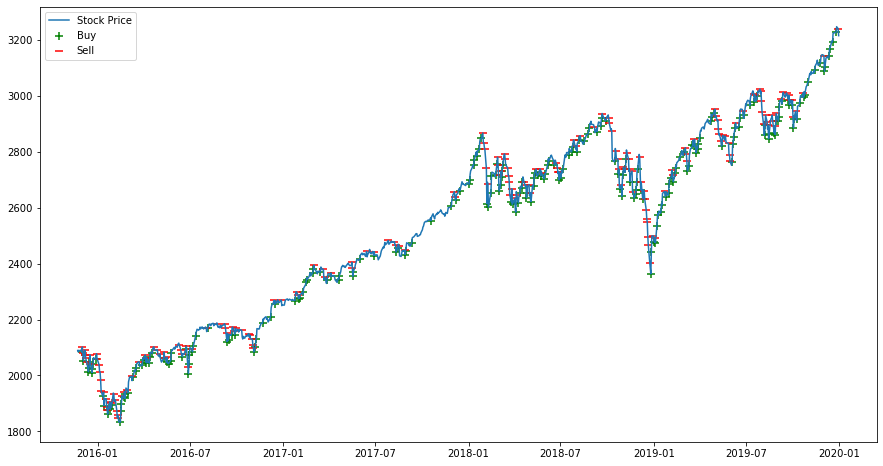

In [6]:
Date = df['Date']
Stock = df['Stock']

Buy_Date = df[df['Stock_class'] == 1][['Date', 'Stock']]
Sell_Date = df[df['Stock_class'] == -1][['Date', 'Stock']]

plt.figure(figsize=(15,8))
plt.plot(Date, Stock, label='Stock Price')
plt.scatter(Buy_Date['Date'], Buy_Date['Stock'], marker = '+', c='g', s=75, label='Buy')
plt.scatter(Sell_Date['Date'], Sell_Date['Stock'], marker = '_', c='r', s=75, label='Sell')
plt.legend()
plt.show()

Check how many Nan entries there are per feature

In [7]:
# Find the number of nulls/NaNs in the dataset
df.apply(lambda x: sum(x.isnull()), axis=0)

Date             0
Stock            0
Oil             10
EuroToDollar    12
Gold             0
Stock_class      0
dtype: int64

Check if there are any missing days

In [8]:
start_date = df['Date'].iloc[0].date()
end_date = df['Date'].iloc[-1].date()

print('Number of Days of Data in Dataset = {}'.format(len(df)))


print('Number of Days between Start and End Date from Dataset = {}'.format(end_date - start_date))

Number of Days of Data in Dataset = 1033
Number of Days between Start and End Date from Dataset = 1499 days, 0:00:00


In [9]:
import pandas_market_calendars as mcal



# Create a calendar
nyse = mcal.get_calendar('NYSE')

NSYE_Days = nyse.schedule(start_date=start_date, end_date=end_date)

print('The Number of Trading Days in the NYSE from {} to {} = {}'.format(start_date, end_date, len(NSYE_Days)))
print('The Number of Days of Data in Dataset from {} to {} = {}'.format(start_date, end_date, len(df)))

The Number of Trading Days in the NYSE from 2015-11-23 to 2019-12-31 = 1033
The Number of Days of Data in Dataset from 2015-11-23 to 2019-12-31 = 1033


No misssing trading days

I used the interpole method based on the following article: https://drnesr.medium.com/filling-gaps-of-a-time-series-using-python-d4bfddd8c460

As it was the best performing method for time series data

Fill Missing values using an interploate method

In [10]:
df = df.interpolate()
df = df.reset_index()

In [11]:
# Find the number of nulls/NaNs in the dataset
df.apply(lambda x: sum(x.isnull()), axis=0)

index           0
Date            0
Stock           0
Oil             0
EuroToDollar    0
Gold            0
Stock_class     0
dtype: int64

Split training and test Data, use 20% of most recent data, as that will be the best representation of future preformance 

In [12]:
#Drop Date as it is not needed
df_X = df[['Gold', 'Oil', 'EuroToDollar', 'Stock']]
df_y = df['Stock']


In [13]:
train_test_spllt = 0.8
Iloc_num = int((len(df_X)*train_test_spllt))

df_X_train = df_X.iloc[:Iloc_num]
df_y_train = df_y.iloc[:Iloc_num]
df_X_test = df_X.iloc[Iloc_num:]
df_y_test = df_y.iloc[Iloc_num:]


print('Training Setp Shape = {} & {}'.format(df_X_train.shape, df_y_train.shape))
print('Test Setp Shape = {} & {}'.format(df_X_test.shape, df_y_test.shape))

Training Setp Shape = (826, 4) & (826,)
Test Setp Shape = (207, 4) & (207,)


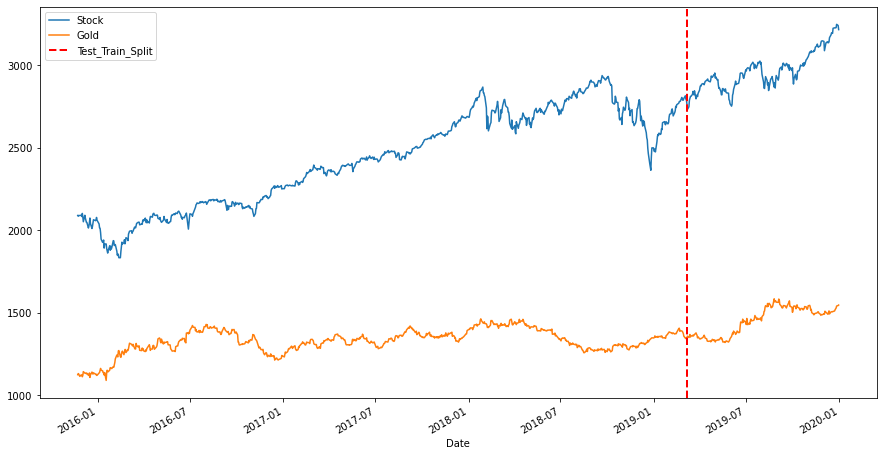

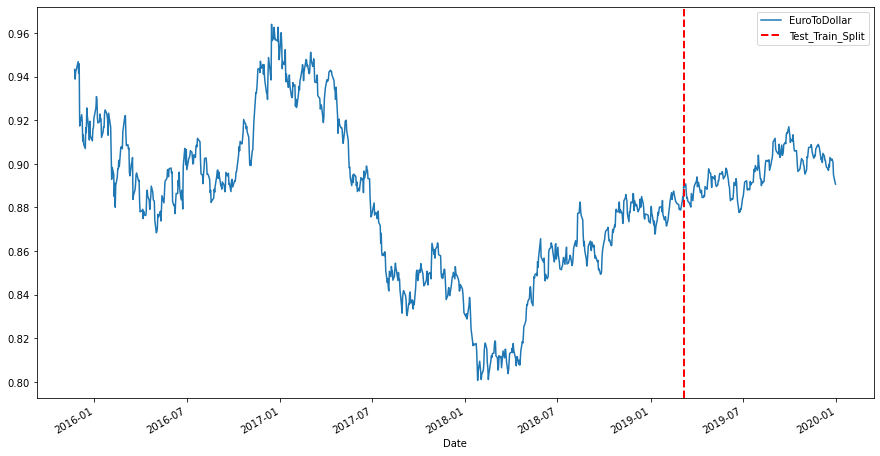

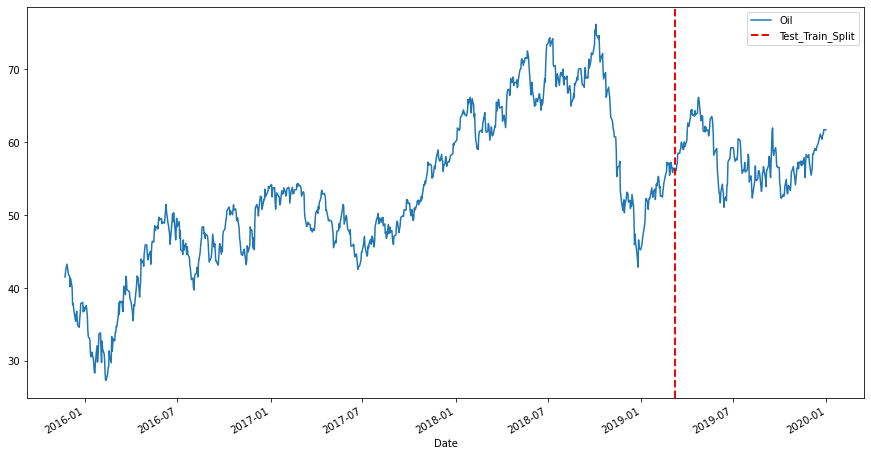

In [14]:
df.plot(x='Date', y=['Stock', 'Gold'], figsize=(15, 8))
plt.axvline(df['Date'].iloc[Iloc_num], color='red', ls='--', lw=2, label='Test_Train_Split')
plt.legend()
plt.show()
df.plot(x='Date', y=['EuroToDollar'], figsize=(15, 8))
plt.axvline(df['Date'].iloc[Iloc_num], color='red', ls='--', lw=2, label='Test_Train_Split')
plt.legend()
plt.show()
df.plot(x='Date', y=['Oil'], figsize=(15, 8))
plt.axvline(df['Date'].iloc[Iloc_num], color='red', ls='--', lw=2, label='Test_Train_Split')
plt.legend()
plt.show()

Use MaxMin scaler to scale the data, fit the transformer on training data and use this to transform test test data. Histogram data before and after so show how transformer works.

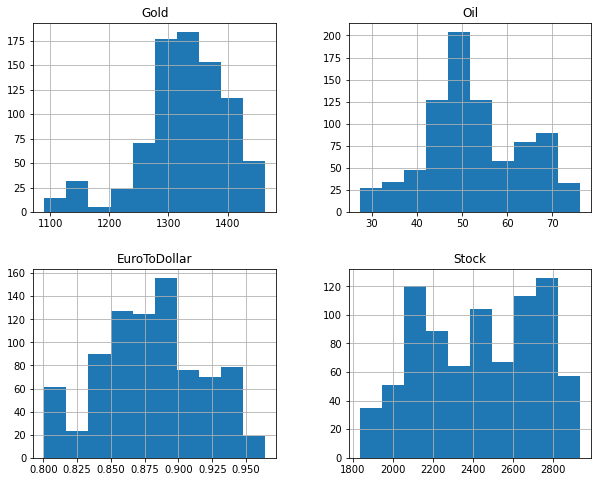

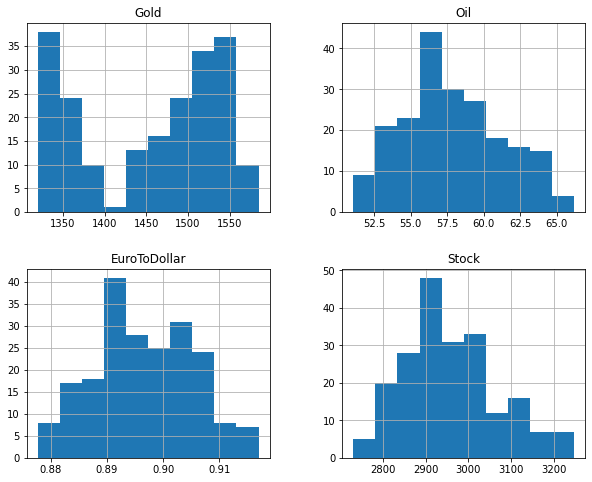

In [15]:
hist = df_X_train.hist(figsize=(10,8))
hist = df_X_test.hist(figsize=(10,8))

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(df_X_train.values)
scaled_df_X_train = pd.DataFrame(scaled_X_train, index=df_X_train.index, columns=df_X_train.columns)

scaled_X_test = scaler.transform(df_X_test.values)
scaled_df_X_test = pd.DataFrame(scaled_X_test, index=df_X_test.index, columns=df_X_test.columns)



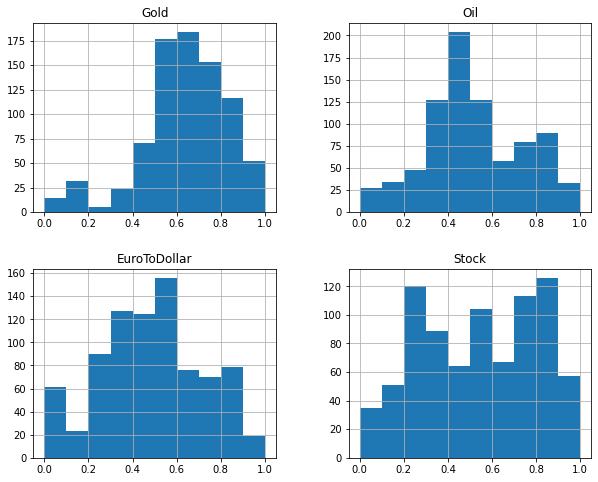

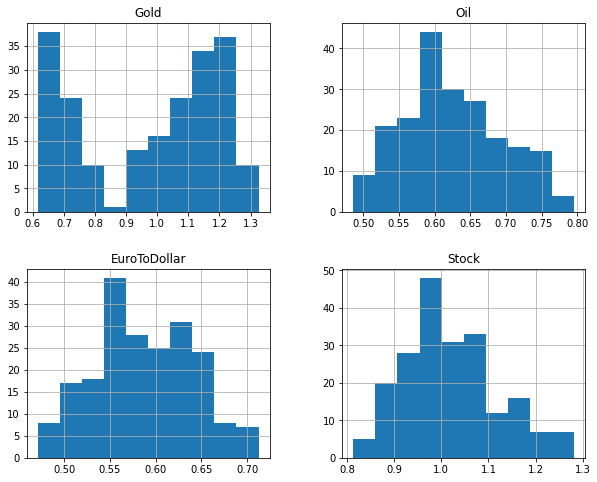

In [17]:
hist = scaled_df_X_train.hist(figsize=(10,8))
hist = scaled_df_X_test.hist(figsize=(10,8))

In [18]:
scaled_y_train = scaler.fit_transform(df_y_train.values.reshape(-1, 1))
scaled_df_y_train = pd.DataFrame(scaled_y_train, index=df_y_train.index)

scaled_y_test = scaler.transform(df_y_test.values.reshape(-1, 1))
scaled_df_y_test = pd.DataFrame(scaled_y_test, index=df_y_test.index)

In [19]:
def process_data(df_x, df_y, look_back, predict_days = 1):
    '''
    Function that Reformats time series Data for LSTM model
    '''
    X, Y = [], []
    
    #Loop through Data. 
    for i in range(len(df_x)-look_back-1):
        #Pick training Data, shape = (Num Features, NumDays)
        x = df_x.iloc[i:(i+look_back)].values.tolist()
        #Pick target Data, starting at the first day beforafter the traing sequnce shape = (1, NumDays)
        y = df_y.iloc[(i+look_back):(look_back+i+predict_days)].values.tolist()
        X.append(x)
        Y.append(y)
        
    return np.array(X), np.array(Y)

In [20]:
X_train, y_train = process_data(scaled_df_X_train, scaled_df_y_train, 5)
X_test, y_test = process_data(scaled_df_X_test, scaled_df_y_test, 5)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(820, 5, 4) (820, 1, 1) (201, 5, 4) (201, 1, 1)


## **Task 3: model construction**

Construct a RNN network that will predict the future value of Stock, one day/time inteval in advance.

I have used LSTM nodes in my model to take adavantage of the infromation from the sequantial nature of the data. The model takes data from the 4 features from 5 days before the target stock value. 

A dropout layer is used during training to prevent overfitting.

An addition dense layer is used to prevent the reduction of dimensions between layer that is greater than an order of magnitude.

The Loss function used during training is mean squared error

In [21]:
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(5, activation='relu'))
model.add(Dense(y_train.shape[1]))

# compile the model
model.compile(loss='mse', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                11000     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 5)                 255       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 11,261
Trainable params: 11,261
Non-trainable params: 0
_________________________________________________________________


In [22]:
#early stopping criteria
earlyStop = EarlyStopping(monitor='loss',  min_delta=0.1, patience = 50, verbose=2)


# fit network
history = model.fit(X_train, y_train, 
                    epochs=1000, 
                    batch_size=32, 
                    validation_split=0.1,
                    callbacks=earlyStop
                    )

Epoch 1/1000
24/24 [==============================] - 2s 39ms/step - loss: 0.3068 - val_loss: 0.2918
Epoch 2/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.1009 - val_loss: 0.0061
Epoch 3/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0298 - val_loss: 0.0217
Epoch 4/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0113 - val_loss: 0.0193
Epoch 5/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0061 - val_loss: 0.0145
Epoch 6/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0058 - val_loss: 0.0122
Epoch 7/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0059 - val_loss: 0.0126
Epoch 8/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0089
Epoch 9/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0055
Epoch 10/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.006

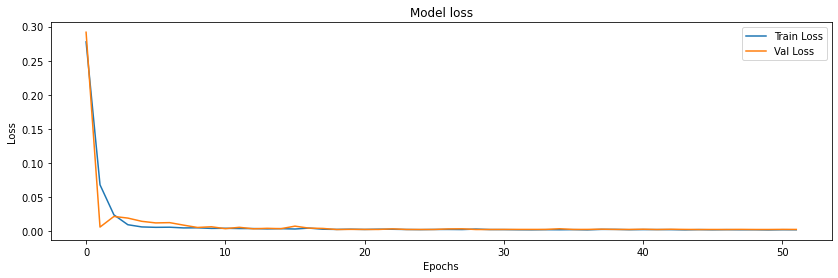

In [23]:
fig, ax1 = plt.subplots(figsize=(14, 4))
plt.plot(history.history['loss'], label='Train Loss',)
plt.plot(history.history['val_loss'], label='Val Loss',)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

## **Task 4: test**

Evaluate the model on the test set and display any change in accuracy over time, if any.

Use the model to predict the training and unseen test data

In [24]:
train_pred = model.predict(X_train)
test_pred  = model.predict(X_test)

# Convert back to inverse of the scaler to compare against actaully stock price
stock_pred_train = scaler.inverse_transform(train_pred)
stock_pred_test = scaler.inverse_transform(test_pred)

stock_train = scaler.inverse_transform(y_train[:, 0])
stock_test = scaler.inverse_transform(y_test[:, 0])

In [25]:
train_err = stock_train - stock_pred_train
test_err = stock_test - stock_pred_test

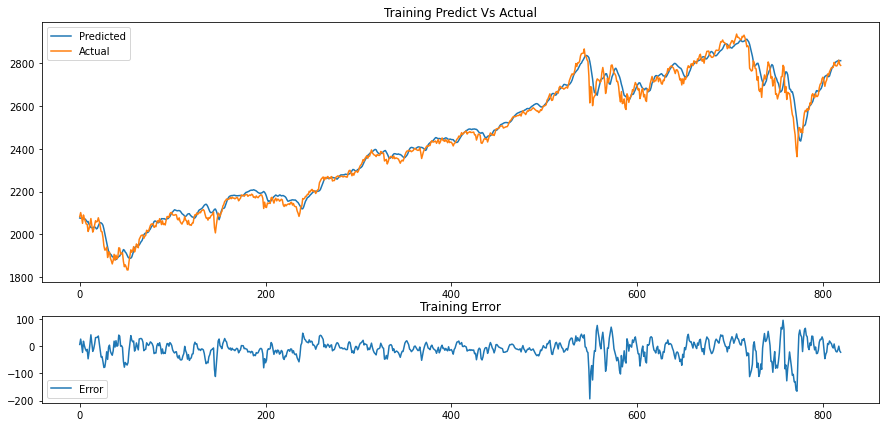

In [26]:
from matplotlib import gridspec

fig = plt.figure(figsize=(15, 7))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 

ax0 = plt.subplot(gs[0])
plt.title('Training Predict Vs Actual')
ax0.plot(stock_pred_train, label='Predicted')
ax0.plot(stock_train, label='Actual')
plt.legend()
ax1 = plt.subplot(gs[1])
ax1.plot(train_err, label='Error')
plt.title('Training Error')
plt.legend()
plt.show()

Model is able to track the stock market very well. The only issue is the predicted data is much more smooth, as in its not predict quick changes

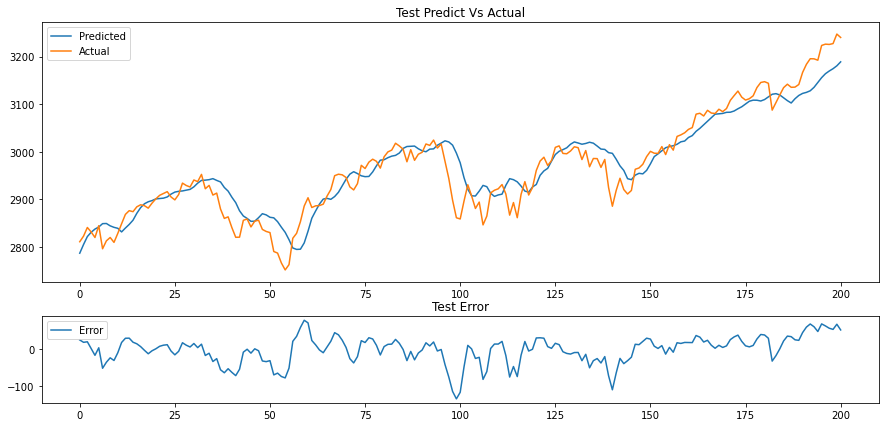

In [27]:
fig = plt.figure(figsize=(15, 7))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 

ax0 = plt.subplot(gs[0])
plt.title('Test Predict Vs Actual')
ax0.plot(stock_pred_test, label='Predicted')
ax0.plot(stock_test, label='Actual')
plt.legend()
ax1 = plt.subplot(gs[1])
ax1.plot(test_err, label='Error')
plt.title('Test Error')
plt.legend()
plt.show()

Unseen test data performs quite well to the similarly to the training results. The best error in both is when a large jump occurs.


In [28]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def reg_metrics(y, y_pred, plot = False, _print = True):
    R2 = r2_score(y, y_pred)
    MAPE = np.mean(np.abs((y-y_pred)/y_pred))
    MAE = mean_absolute_error(y, y_pred)
    MSE = mean_squared_error(y, y_pred)
    RMSE = np.sqrt(MSE)
    
    residuals = y - y_pred
    max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
    max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
    max_true, max_pred = y[max_idx], y_pred[max_idx]
    
    if _print:
        ## Kpi
        print("R2 (explained variance):", round(R2, 5))
        print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(MAPE, 5))
        print("Mean Absolute Error (Σ|y-pred|/n):", "{}".format(round(MAE, 5)))
        print("Mean Squared Error (Σ(y-pred)^2/n):", "{}".format(round(MSE, 5)))
        print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{}".format(round(RMSE, 5)))
        ## residuals

        print("Max Error: {}".format(max_error, 2))
    
    if plot:
        ## Plot predicted vs true
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
        from statsmodels.graphics.api import abline_plot
        ax[0].scatter(y_pred, y, color="black")
        abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
        ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
        ax[0].grid(True)
        ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
        ax[0].legend()

        ## Plot predicted vs residuals
        ax[1].scatter(y_pred, residuals, color="red")
        ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
        ax[1].grid(True)
        ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
        ax[1].hlines(y=0, xmin=np.min(y_pred), xmax=np.max(y_pred))
        ax[1].legend()
        plt.show()
        

Training Regression Metrics
R2 (explained variance): 0.98678
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.00967
Mean Absolute Error (Σ|y-pred|/n): 23.6404
Mean Squared Error (Σ(y-pred)^2/n): 1106.73727
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 33.26766
Max Error: [-193.90527344]


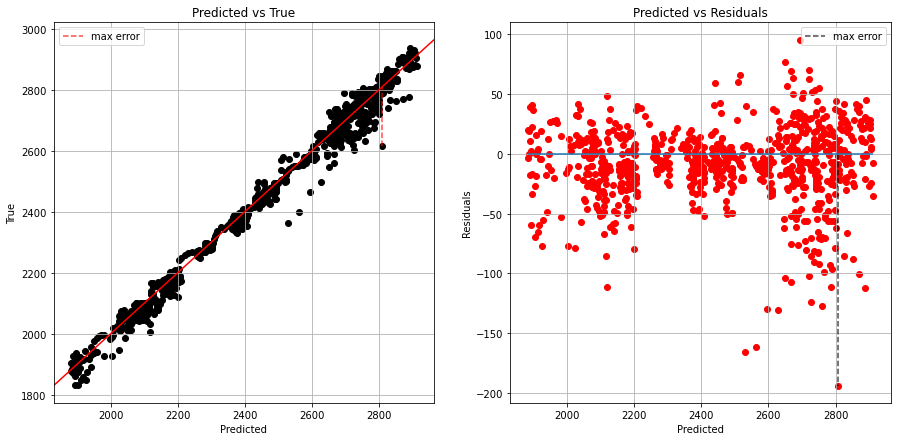

In [29]:
print('\033[1m' + 'Training Regression Metrics' + '\033[0m')
reg_metrics(stock_train, stock_pred_train, plot = True, _print = True)

Test Regression Metrics
R2 (explained variance): 0.88278
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.0093
Mean Absolute Error (Σ|y-pred|/n): 27.62921
Mean Squared Error (Σ(y-pred)^2/n): 1360.54872
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 36.88562
Max Error: [-135.87890625]


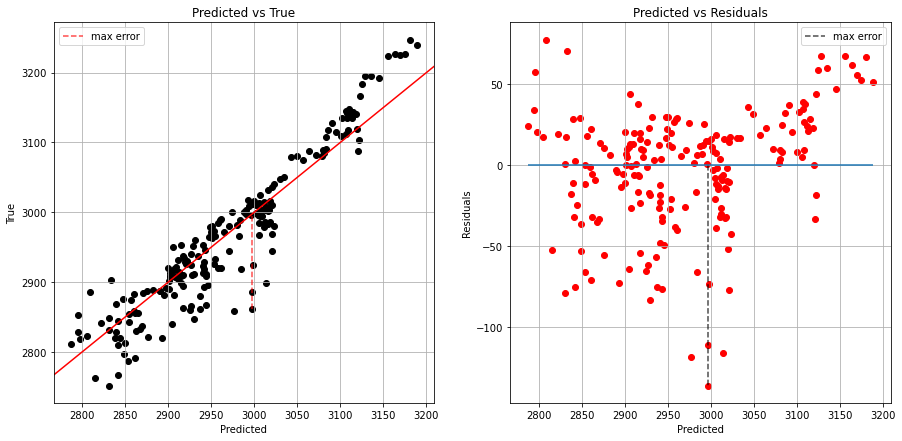

In [30]:
print('\033[1m' + 'Test Regression Metrics' + '\033[0m')
reg_metrics(stock_test, stock_pred_test, plot = True, _print = True)

The metrics i have used able should that the model performances similarly to training and test data, and that over fitting is not happening

### Addition Day Trading test

Here I am checking if that model would be of any use to a day trader. Where all the care about is the day on day change and not the overall trend

See if the model can indicated if you should buy or sell based on classifing the price increasing by 0.5% over the previous Day, half a precent what selected to make sure the class was to unblanced 

- -1 means sell
- 0 means Do nothing
- 1 means Buy

In [31]:
train_class = class_stock(stock_train, 0.5)
pred_train_class = class_stock(stock_pred_train, 0.5)
test_class = class_stock(stock_test, 0.5)
pred_test_class = class_stock(stock_pred_test, 0.5)

In [32]:
unique, counts = np.unique(train_class, return_counts=True)
dict(zip(unique, counts))

{-1.0: 141, 0.0: 513, 1.0: 166}

In the training set there 141 days where the price decreased by 0.5% or more, 166 where the price increased by 166 days or more, amd 513 days where the there was not an increase or decrease from the day before

In [33]:
unique, counts = np.unique(test_class, return_counts=True)
dict(zip(unique, counts))

{-1.0: 38, 0.0: 114, 1.0: 49}

Train                                         Test  \
                 -1.0         0.0         1.0  accuracy       -1.0   
precision    0.296296    0.656904    0.244898  0.608537   0.125000   
recall       0.113475    0.918129    0.072289  0.608537   0.026316   
f1-score     0.164103    0.765854    0.111628  0.608537   0.043478   
support    141.000000  513.000000  166.000000  0.608537  38.000000   

                                            
                  0.0        1.0  accuracy  
precision    0.571429   0.272727  0.537313  
recall       0.912281   0.061224  0.537313  
f1-score     0.702703   0.100000  0.537313  
support    114.000000  49.000000  0.537313

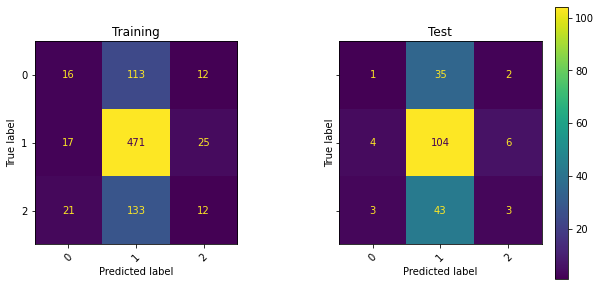

In [34]:
y_train, y_pred = train_class, pred_train_class
y_test, y_pred_test = test_class, pred_test_class

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

df_report_train = pd.DataFrame.from_dict(classification_report(y_train, y_pred, output_dict=True)).drop(['macro avg','weighted avg'], axis= 1)
df_report_val = pd.DataFrame.from_dict(classification_report(y_test, y_pred_test, output_dict=True)).drop(['macro avg','weighted avg'], axis= 1)
d = {"Train":df_report_train, "Test":df_report_val}
display(pd.concat(d.values(), axis=1, keys=d.keys()))

f, axes = plt.subplots(1, 2, figsize=(10, 5), sharey='row')

cm = confusion_matrix(y_train, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=axes[0], xticks_rotation=45)
disp.ax_.set_title('Training')
disp.im_.colorbar.remove()

cm = confusion_matrix(y_test, y_pred_test) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=axes[1], xticks_rotation=45)
disp.ax_.set_title('Test')
plt.show()

As see in the graph above the model is not good at predicting sudden or large changes to stock market. Most of the predict values are with 0.5% of the value of the stock price from the day before.

This model would not be a good product to use for day trading predicts 

## Task 5:  

Keeping top_words, max_review_lenngth and the embedding_vector_length the same, change the model so that it uses attention only, i.e. there are no recurrent components. The only Keras layers (defined here https://keras.io/api/) that you allowed to use are:
- Input,
- Embedding, 
- Dense, 
- Any Attention (must be at leat one),
- TimeDistributed,
- Any Merging,
- Any Reshaping,
- Any Pooling,
- Dropout. 

In [35]:
embedding_vector_length = 16
top_words = 100
(Rev_train, Sc_train), (Rev_test, Sc_test) = imdb.load_data(num_words=top_words)

max_review_length = 500
X_train = sequence.pad_sequences(Rev_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(Rev_test, maxlen=max_review_length)


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\mdavi\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\mdavi\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or

The Attention Layer I have implemented is adopted from the following blog post: https://towardsdatascience.com/create-your-own-custom-attention-layer-understand-all-flavours-2201b5e8be9e

The results are not good from this model when compared to the model given to us in the orginal notebook.

In [36]:
from keras import backend as K

class SelfAttention(Layer): 
    def __init__(self):    
        # Nothing to be done here
        super(SelfAttention, self).__init__()
        
    def build(self, input_shape):
        # Define the shape of the weights and bias in this layer
        print(input_shape)
        
        self.w=self.add_weight(shape=(input_shape[-1],1), initializer="normal")
        self.b=self.add_weight(shape=(input_shape[-2],1), initializer="zeros")
        super(SelfAttention, self).build(input_shape)
        
    def call(self, x):
        # Below is the main processing done during training
        e = K.tanh(K.dot(x,self.w)+self.b)
        a = K.softmax(e, axis=1)
        output = x*a
        
        return a, K.sum(output, axis=1)

In [37]:
# Create word-level binary sentiment classification model
# Input Layer
X = Input(shape=(max_review_length))

# Word-Embedding Layer
embedded = Embedding(top_words, embedding_vector_length, input_length=max_review_length)(X)

embedded, attention_weights = SelfAttention()(embedded)

H1 = Dense(units=50, activation='relu')(embedded)

H2 = Dense(units=5, activation='relu')(H1)

# Prediction Layer
Y = Dense(units=1, activation='sigmoid')(H2)

# Compile model
model = Model(inputs=X, outputs=Y)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

(None, 500, 16)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 500, 16)           1600      
_________________________________________________________________
self_attention (SelfAttentio ((None, 500, 1), (None, 1 516       
_________________________________________________________________
dense_2 (Dense)              (None, 500, 50)           100       
_________________________________________________________________
dense_3 (Dense)              (None, 500, 5)            255       
_________________________________________________________________
dense_4 (Dense)              (None, 500, 1)            6         
Total params: 2,477
Trainable params: 2,477
Non-trainable params: 0
___________________________________________

In [38]:
# Train binary-classification model
training = model.fit(x=X_train, y=Sc_train,
          validation_data=(X_test, Sc_test),
          epochs=10, batch_size=256).history

Epoch 1/10
98/98 [==============================] - 6s 52ms/step - loss: 0.6932 - accuracy: 0.4929 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
98/98 [==============================] - 5s 48ms/step - loss: 0.6932 - accuracy: 0.4957 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
98/98 [==============================] - 5s 49ms/step - loss: 0.6932 - accuracy: 0.4957 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
98/98 [==============================] - 5s 54ms/step - loss: 0.6931 - accuracy: 0.5012 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
98/98 [==============================] - 5s 54ms/step - loss: 0.6932 - accuracy: 0.5004 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
98/98 [==============================] - 5s 52ms/step - loss: 0.6932 - accuracy: 0.5032 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
98/98 [==============================] - 5s 50ms/step - loss: 0.6932 - accuracy: 0.5016 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/10
98

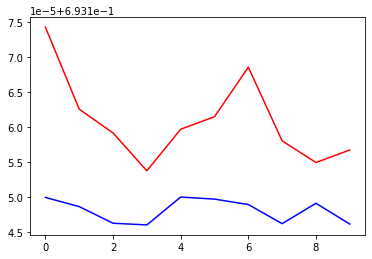

In [39]:
nepoch = 10
plt.plot(range(nepoch),training['loss'],c='r')
plt.plot(range(nepoch),training['val_loss'],c='b')
plt.show()

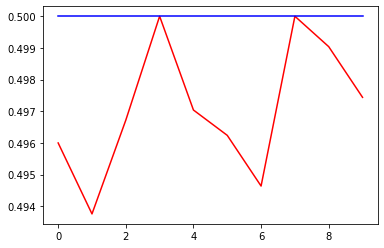

In [40]:
plt.plot(range(nepoch),training['accuracy'],c='r')
plt.plot(range(nepoch),training['val_accuracy'],c='b')
plt.show()

In [41]:
## Add additional code cells to implememt the tasks stated above 

In [42]:
embedding_vector_length = 16
top_words = 100
(Rev_train, Sc_train), (Rev_test, Sc_test) = imdb.load_data(num_words=top_words)

max_review_length = 500
X_train = sequence.pad_sequences(Rev_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(Rev_test, maxlen=max_review_length)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 16)           1600      
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 16)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                1080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 2,691
Trainable params: 2,691
Non-trainable params: 0
_________________________________________________________________
None


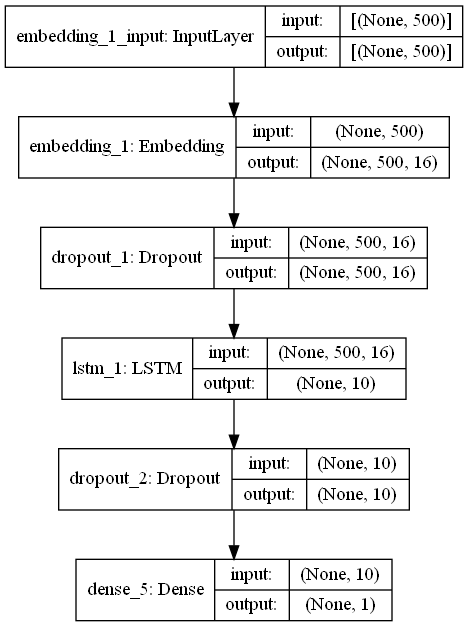

In [43]:

model_imdb = Sequential()
model_imdb.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model_imdb.add(Dropout(0.2))
model_imdb.add(LSTM(10))
model_imdb.add(Dropout(0.2))
model_imdb.add(Dense(1, activation='sigmoid'))
model_imdb.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_imdb.summary())
plot_model(model_imdb,show_shapes=True)


The history for the model above has been saved, as it takes a while to run. If you want to run it yourself then comment out the second line.


[]

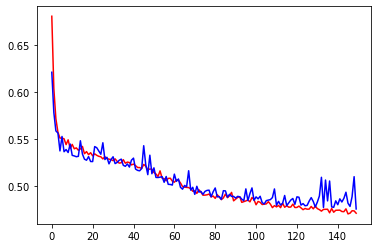

In [44]:
nepoch = 150
#IMDB_history = model_imdb.fit(X_train,Sc_train,validation_data=(X_test,Sc_test),epochs=nepoch,batch_size=256)
IMDB_history=np.load('IMDBTrainhist.npy',allow_pickle='TRUE').item()
plt.plot(range(nepoch),IMDB_history['loss'],c='r')
plt.plot(range(nepoch),IMDB_history['val_loss'],c='b')
plt.plot()

[]

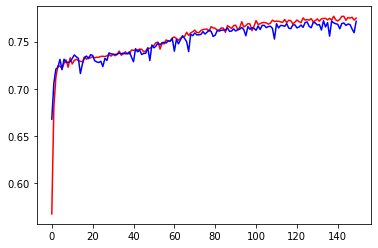

In [45]:
plt.plot(range(nepoch),IMDB_history['accuracy'],c='r')
plt.plot(range(nepoch),IMDB_history['val_accuracy'],c='b')
plt.plot()